#**Assignment Guidance: Hypothesis Testing Concepts**

##**Import dari file dari Gdrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##**Import Library**

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import warnings
warnings.filterwarnings('ignore')


#Membaca data
df = pd.read_csv('/content/drive/MyDrive/marketing_campaign.csv', sep='\t')


##**A. Bagian 1: Statistik Deskriptif & Eksplorasi Awal**

* **Pahami struktur dataset yang digunakan dan identifikasi variabel penting**
* **Gunakan teknik eksplorasi data untuk mengenali pola dan karakteristik data**
* **Tampilkan ringkasan statistik deskriptif yang memberikan gambaran tentang distribusi data**

> **Lihat Struktur Data**

In [ ]:
#menampilkan 5 data pertama
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Dataset terdiri dari berbagai kolom: demografis (Income, Education, Age), perilaku (Response, MntWines, MntGoldProds, dsb), dan data kampanye (AcceptedCmp1, Response, dll).

In [ ]:
# menampilkan informasi tentang data yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Cek missing value
print(df.isna().sum())

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [ ]:
df.groupby('Education')['MntWines'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
2n Cycle,203.0,198.182266,261.475727,0.0,9.00,48.0,347.00,1215.0
Basic,54.0,7.240741,30.763207,0.0,1.00,2.0,4.75,228.0
Graduation,1127.0,284.268855,308.212588,0.0,23.00,183.0,458.50,1492.0
Master,370.0,333.075676,354.100379,2.0,37.25,179.0,542.00,1486.0
PhD,486.0,404.495885,390.327036,2.0,52.00,276.5,698.75,1493.0


Saya sengaja membandingkan antara **master dan PhD**karena dilihat dari rata''nya tidak terlalu **timpang**, dibandingkan dengan yang lain. seperti basic untuk meannya adalah 7.2 sehingga apabila data tersebut saya gunakan, terlalu timpang dengan data yang lain


In [ ]:
df.groupby('Education')['MntWines'].var()

,MntWines
Education,
2n Cycle,68369.555724
Basic,946.374913
Graduation,94994.999589
Master,125387.078269
PhD,152355.194828


Interpretasikan hasil eksplorasi untuk memahami distribusi data dan kemungkinan permasalahan dalam dataset.

| Masalah                      | Penjelasan                                                                     |
| ---------------------------- | ------------------------------------------------------------------------------ |
|  **Skewed Distribution**    | Banyak kolom numerik tidak terdistribusi normal → uji parametris tidak valid   |
|  **Missing Value (Income)** | 24 nilai kosong bisa memengaruhi akurasi analisis                              |
|  **Outlier**                | Income & MntWines punya nilai ekstrem → analisis bisa bias tanpa penanganan    |
|  **Kategori Tidak Umum**    | Marital\_Status berisi nilai seperti “YOLO”, “Absurd” yang tidak lazim         |
|  **Redundansi Waktu**       | Tanggal pelanggan (Dt\_Customer) tidak dibersihkan atau diubah ke format waktu |
|  **Kolom Dummy**            | Kolom seperti `Z_CostContact`, `Z_Revenue` semuanya konstan = tidak informatif |


## **2. Uji Hipotesis**

### **1. Definisikan hipotesis yang relevan sesuai dengan tujuan analisis.**

* **Apakah pembelian wine (kolom MntWines) dipengaruhi oleh tingkat pendidikan ( Master dan PhD)?**

> H₀ (Hipotesis nol):
Tidak terdapat perbedaan distribusi pembelian wine antara individu dengan pendidikan Master dan PhD.

> H₁ (Hipotesis alternatif):
Terdapat perbedaan distribusi pembelian wine antara individu dengan pendidikan Master dan PhD.

### **2. Pilih metode uji hipotesis yang sesuai dengan jenis data dan tujuan analisis.**


Kolom MntWines adalah data numerik (skala rasio).

Kolom Education (Master vs PhD) adalah kategorik (2 grup).


### **3. Pastikan pemilihan metode (misalnya t-test, ANOVA, atau Chi-Square) dilakukan dengan mempertimbangkan asumsi statistik yang diperlukan.**

In [ ]:
#data terdistribusi normal atau tidak
from scipy.stats import shapiro

# Uji Shapiro-Wilk untuk masing-masing kelompok
for edu in ['Master', 'PhD']:
    stat, p = shapiro(filtered_df[filtered_df['Education'] == edu]['MntWines'])
    print(f"{edu} - Shapiro-Wilk p-value: {p:.4f}")

# mengecek skewness masing-masing gender
print ("Skewness MntWines untuk PhD:", df[df['Education'] == 'PhD']['MntWines'].skew())
print ("Skewness MntWines untuk Master:", df[df['Education'] == 'Master']['MntWines'].skew())

Master - Shapiro-Wilk p-value: 0.0000
PhD - Shapiro-Wilk p-value: 0.0000
Skewness MntWines untuk PhD: 0.8139412861927156
Skewness MntWines untuk Master: 1.0704431212931422


In [ ]:
from scipy.stats import skew
# Filter data hanya untuk Master dan PhD
filtered_df = df[df['Education'].isin(['Master', 'PhD'])]

# Hitung skewness untuk masing-masing kelompok
skew_master = skew(filtered_df[filtered_df['Education'] == 'Master']['MntWines'])
skew_phd = skew(filtered_df[filtered_df['Education'] == 'PhD']['MntWines'])

#mengecek skewness masing-masing gender

print (f"Skewness MntWines untuk Master: {skew_master:.4f}")
print (f"Skewness MntWines untuk PhD: {skew_phd:.4f}")


Skewness MntWines untuk Master: 1.0661
Skewness MntWines untuk PhD: 0.8114


***Apa interpretasi terhadap hasil skewness di atas?***

- skewness ~ 0 --> simetris
- skewness > 0 --> positif, miring ke kanan
- skewness < 0 --> negatif, miring ke kiri

- -0.5 - 0.5 --> masih bisa dibilang simetris
- -1 sampai -0.5 atau sebaliknya (0.5 - 1): agak miring
- < -1 atau > 1: sangat miring

* **Pola Pembelian per Kelompok**

**Kelompok Master**
memiliki distribusi yang:

Lebih lebar dan menyebar.

Ada lebih banyak individu yang membeli wine mendekati batas atas (900–1000).

Skewness lebih tinggi (≈ 1.07), artinya ketimpangannya lebih besar.

**Kelompok PhD:**

Distribusinya sedikit lebih simetris, walau tetap skew ke kanan.

Sebaran pembeliannya lebih terpusat di tengah rentang (500–700).

Ini menunjukkan pola yang lebih stabil dan kurang ekstrem dibanding Master.

* **Bentuk Distribusi**

Kedua distribusi (baik Master maupun PhD) miring ke kanan (right-skewed), artinya:

Mayoritas individu dalam kedua kelompok membeli wine dalam jumlah di bawah rata-rata.

Hanya sebagian kecil yang melakukan pembelian dalam jumlah sangat tinggi (outlier).

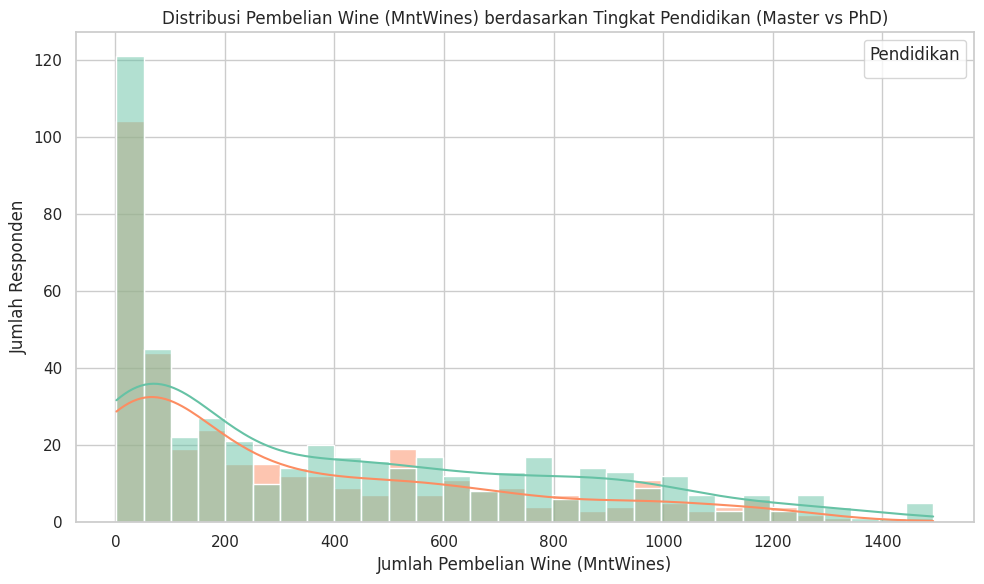

In [ ]:
# Filter hanya data dengan Education Master dan PhD
education_filtered_df = df[df['Education'].isin(['Master', 'PhD'])]

# Visualisasi histogram seluruh data MntWines untuk kategori Master dan PhD
plt.figure(figsize=(10, 6))
sns.histplot(data=education_filtered_df, x='MntWines', hue='Education', kde=True, bins=30, palette='Set2')
plt.title('Distribusi Pembelian Wine (MntWines) berdasarkan Tingkat Pendidikan (Master vs PhD)')
plt.xlabel('Jumlah Pembelian Wine (MntWines)')
plt.ylabel('Jumlah Responden')
plt.legend(title='Pendidikan')
plt.tight_layout()

* **Hubungan dengan Statistik**

Distribusi ini mendukung hasil statistik sebelumnya:

Skewness Master lebih tinggi → distribusi lebih miring.

Kedua distribusi tidak normal, sehingga penggunaan Mann-Whitney U Test sebagai uji non-parametrik adalah pilihan yang tepat.

Distribusi MntWines tidak normal → Uji non-parametrik diperlukan juga karena P Value < 0.05

> Jika p-value > 0.05: data normal

> Jika p-value < 0.05: data tidak normal

### **4. Hitung nilai p-value dan interpretasikan hasilnya untuk menentukan apakah H0 dapat diterima atau ditolak.**

In [ ]:
from scipy.stats import mannwhitneyu

# Ambil data
master = filtered_df[filtered_df['Education'] == 'Master']['MntWines']
phd = filtered_df[filtered_df['Education'] == 'PhD']['MntWines']

# Uji Mann-Whitney U
stat, p = mannwhitneyu(master, phd, alternative='two-sided')
print(f"Mann-Whitney U Test p-value: {p:.4f}")

Mann-Whitney U Test p-value: 0.0089


p-value = 0.0089 < 0.05 → Tolak H₀.

Artinya, terdapat perbedaan signifikan dalam jumlah pembelian wine antara kelompok Master dan PhD.

Jadi, tingkat pendidikan berpengaruh terhadap jumlah pembelian wine.

## **3. Interpretasi dan Kesimpulan**

## **1. Interpretasi dan Kesimpulan**

* **Berdasarkan statistik deskriptif:**

In [ ]:
filtered_df.groupby('Education')['MntWines'].describe()


,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Master,370.0,333.075676,354.100379,2.0,37.25,179.0,542.00,1486.0
PhD,486.0,404.495885,390.327036,2.0,52.00,276.5,698.75,1493.0


Terlihat bahwa PhD cenderung membeli lebih banyak wine dibandingkan Master.

Perbedaan ini mungkin mencerminkan preferensi personal, daya beli, atau pola konsumsi berdasarkan latar belakang pendidikan.

* **visualisasi boxplot**

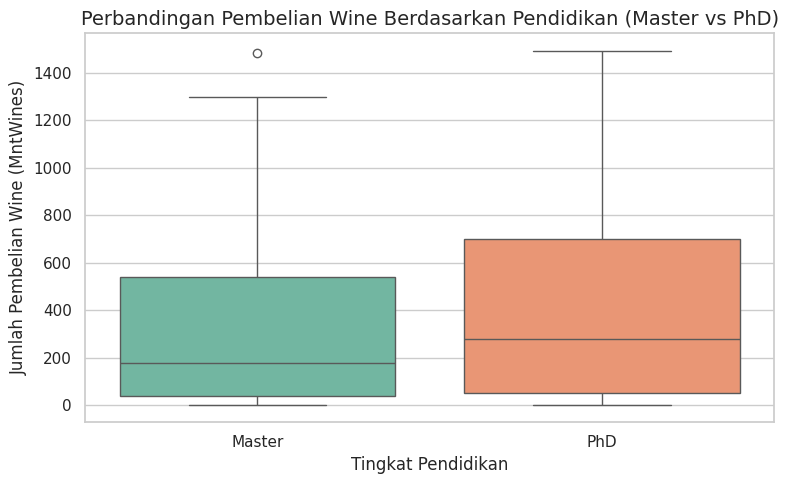

In [ ]:
# Set style
sns.set(style="whitegrid")

# Buat boxplot untuk membandingkan MntWines berdasarkan pendidikan
plt.figure(figsize=(8, 5))
sns.boxplot(x='Education', y='MntWines', data=filtered_df, order=['Master', 'PhD'], palette="Set2")

# Judul dan label
plt.title('Perbandingan Pembelian Wine Berdasarkan Pendidikan (Master vs PhD)', fontsize=14)
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Jumlah Pembelian Wine (MntWines)')
plt.tight_layout()
plt.show()

Insight dari Visualisasi:
Median pembelian wine untuk kategori PhD tampak sedikit lebih tinggi dibandingkan dengan Master.

Namun, sebaran data (interquartile range) untuk keduanya cukup luas, menunjukkan variasi pembelian wine yang signifikan dalam masing-masing kelompok.

Ada beberapa outlier di kedua kelompok, menunjukkan ada individu dengan pembelian yang jauh lebih tinggi dari rata-rata.

### **2.Tinjau dampak dari hasil analisis terhadap pengambilan keputusan atau langkah selanjutnya dalam penelitian.**

Hasil ini bisa digunakan oleh tim marketing untuk:

Menyesuaikan strategi promosi berdasarkan segmen pendidikan.

Merancang kampanye yang lebih tertarget (misal: tawaran khusus untuk konsumen dengan gelar PhD).

Meyakinkan kembali asumsi bahwa tingkat pendidikan tertinggi (PhD) selalu menjadi segmen pembelian terbesar.

### **3. Pastikan kesimpulan didukung oleh hasil statistik yang diperoleh.**

* **Kesimpulan**

Berdasarkan statistik deskriptif ditemukan bahwa data di kolom MntWines tidak terdistribusi dengan normal, dilihat dari temuan uji normalitas menggunakan shapiro untuk masih masing kelompok (Master dan PhD) menunjukan nilan < 0.005 dan juga dilihat dari skewness dari kedua data menunjukan data kebih terdistribusi di kanan. Agar data bisa dilakukan analisis lanjut apabila tidak bisa dilakukan menggunakan T-Test maka bisa menggunakan uji Mann-Whitney U.

Berdasarkan uji Mann-Whitney U, ditemukan bahwa terdapat perbedaan signifikan dalam jumlah pembelian wine antara kelompok pendidikan Master dan PhD (p =  0.0089).
Ini menunjukkan bahwa tingkat pendidikan memengaruhi perilaku konsumsi wine, dan dapat dijadikan acuan dalam pengambilan keputusan pemasaran berbasis segmen pelanggan.

Hasil ini bisa digunakan oleh tim marketing untuk:
Merancang kampanye yang lebih tertarget (misal: tawaran khusus untuk konsumen dengan gelar PhD).